In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./cancer.csv')
data.head()

id  Clump Thickness  UofCSize  UofCShape  Marginal Adhesion  SECSize  \
0  1000025                5         1          1                  1        2   
1  1002945                5         4          4                  5        7   
2  1015425                3         1          1                  1        2   
3  1016277                6         8          8                  1        3   
4  1017023                4         1          1                  3        2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1        1      2  
1           10                3                2        1      2  
2            2                3                1        1      2  
3            4                3                7        1      2  
4            1                3                1        1      2

In [3]:
#Remove Model from Dataset
data=data.drop('id',axis=1)
data.head()

Clump Thickness  UofCSize  UofCShape  Marginal Adhesion  SECSize  \
0                5         1          1                  1        2   
1                5         4          4                  5        7   
2                3         1          1                  1        2   
3                6         8          8                  1        3   
4                4         1          1                  3        2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1        1      2  
1           10                3                2        1      2  
2            2                3                1        1      2  
3            4                3                7        1      2  
4            1                3                1        1      2

In [4]:
#Show Key Statistics
data.describe()

Clump Thickness    UofCSize   UofCShape  Marginal Adhesion     SECSize  \
count       683.000000  683.000000  683.000000         683.000000  683.000000   
mean          4.442167    3.150805    3.215227           2.830161    3.234261   
std           2.820761    3.065145    2.988581           2.864562    2.223085   
min           1.000000    1.000000    1.000000           1.000000    1.000000   
25%           2.000000    1.000000    1.000000           1.000000    2.000000   
50%           4.000000    1.000000    1.000000           1.000000    2.000000   
75%           6.000000    5.000000    5.000000           4.000000    4.000000   
max          10.000000   10.000000   10.000000          10.000000   10.000000   

       Bare Nuclei  Bland Chromatin  Normal Nucleoli     Mitoses       Class  
count   683.000000       683.000000       683.000000  683.000000  683.000000  
mean      3.544656         3.445095         2.869693    1.603221    2.699854  
std       3.643857         2.449697         3.052666    1.732674    0.954592  
min       1.000000         1.000000         1.000000    1.000000    2.000000  
25%       1.000000         2.000000         1.000000    1.000000    2.000000  
50%       1.000000         3.000000         1.000000    1.000000    2.000000  
75%       6.000000         5.000000         4.000000    1.000000    4.000000  
max      10.000000        10.000000        10.000000   10.000000    4.000000

In [5]:
#Define x and y variable
x = data.drop('Class',axis=1).values
y = data['Class'].values

In [6]:
#Prepare for Models for Comparison

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

C:\Users\100274743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\100274743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\100274743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\100274743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\100274743\AppData\L

In [7]:
#Prepare Models 
import xgboost as xgb
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

Model Evaluation - Accuracy Score
Logistic Regression 0.97 +/- 0.02
Random Forest 0.97 +/- 0.02
Bagging Classifier 0.96 +/- 0.03
AdaBoost 0.96 +/- 0.02
GBC 0.97 +/- 0.02
XGB 0.97 +/- 0.02
LGBM 0.97 +/- 0.02




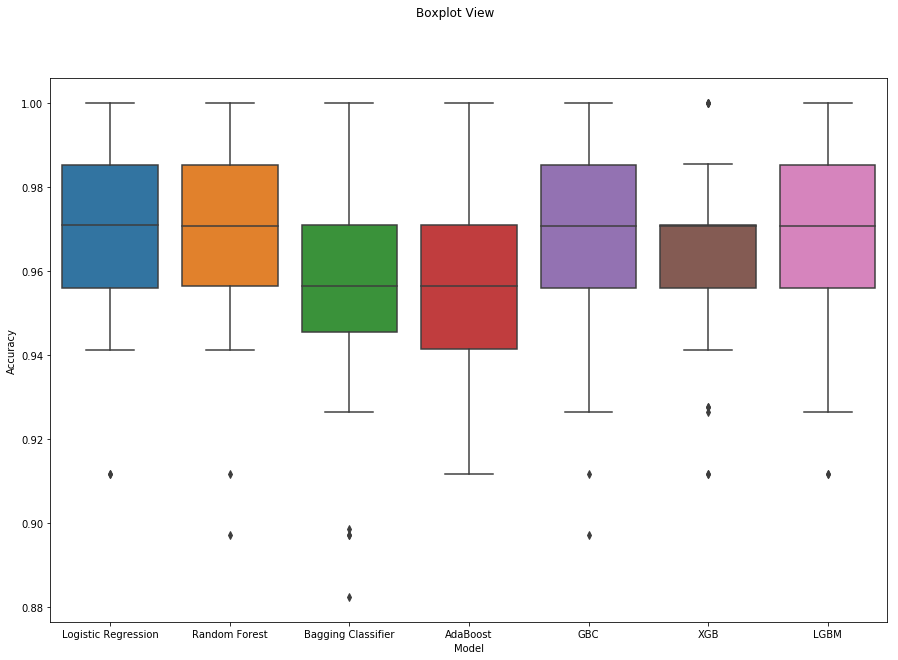

In [8]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',LogisticRegression(solver='liblinear',
                                                        class_weight='balanced',
                                                        random_state=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))
models.append(('Bagging Classifier',BaggingClassifier(random_state=100)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=100)))
models.append(('GBC',GradientBoostingClassifier(random_state=100)))
models.append(('XGB',XGBClassifier(random_state=100)))
models.append(('LGBM',LGBMClassifier(objective='binary',random_state=100)))         
  
#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [9]:
#Create Voting Model
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

estimators = []

model1 = LogisticRegression(solver='liblinear',class_weight='balanced',
                            random_state=100)
estimators.append(('Logistic', model1))

model2 = AdaBoostClassifier(random_state=100)
estimators.append(('AdaBoost', model2))

model3 = BaggingClassifier(random_state=100)
estimators.append(('Bagging Classifier', model3))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')

for clf in (model1,model2,model3,voting_clf):
    rkfcv= clf.fit(x_train2,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_prec_macro'].mean(),2))   


Voting Model
LogisticRegression 0.97
AdaBoostClassifier 0.96
BaggingClassifier 0.96
VotingClassifier 0.97


In [1]:
#Gridsearch Setup
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Cross Validation
cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)

#Parameter Grid
param_grid = [{'LR__C': [0.01, 0.1, 1, 10, 100],
               'LR__penalty': ['l1', 'l2']}]

param_grid2 = [{'meta-logisticregression__C': [0.01, 0.1, 1, 10, 100],
               'meta-logisticregression__penalty': ['l1', 'l2']}]

NameError: name 'RepeatedKFold' is not defined

In [11]:
#Gridsearch - Voting

gs = GridSearchCV(estimator=voting_clf, 
                  param_grid=param_grid, 
                  scoring='accuracy', cv=cv2)

gs_clf = gs.fit(x_train2,y_train_smt)

model = gs_clf.best_estimator_

#Nested CV
scoreACC = cross_val_score(gs_clf, x_2, y,scoring='accuracy', 
                           cv=5,n_jobs= -1)
    
scorePM = cross_val_score(gs_clf, x_2, y,scoring='precision_weighted', 
                          cv=5,n_jobs= -1)
    
scoreRM = cross_val_score(gs_clf, x_2, y,scoring='recall_weighted', 
                          cv=5, n_jobs= -1)

# Use best model and test data for final evaluation
y_pred = model.predict(x_test2)
    
#Identify Best Parameters to Optimize the Model
bestpara=str(gs_clf.best_params_)

print('\nOptimized Voting Classifier')
print('\nBest Parameters:',bestpara)
print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))


Optimized Voting Classifier

Best Parameters: {'Logistic__C': 10, 'Logistic__penalty': 'l1'}

NestedCV Accuracy(weighted) :0.97 +/-0.02 
NestedCV Precision(weighted) :0.97 +/-0.02 
NestedCV Recall(weighted) :0.97 +/-0.02 


In [12]:
#Create Stacking Model
from mlxtend.classifier import StackingCVClassifier

#Identify Models
lr = LogisticRegression(solver='liblinear',class_weight='balanced',
                            random_state=100)
mod1 = AdaBoostClassifier(random_state=100)
mod2 = BaggingClassifier(random_state=100)
mod3 = LGBMClassifier(objective='binary',random_state=100)

#Create Stacking Classifier
np.random.seed(100)
stackmod=StackingCVClassifier(classifiers=[mod1,mod2,mod3],
                             meta_classifier=lr)

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

print('\nStacking Model')

for clf in (mod1,mod2,mod3,stackmod):
    rkfcv= clf.fit(x_train2,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_prec_macro'].mean(),2))  


Stacking Model
AdaBoostClassifier 0.96
BaggingClassifier 0.96
LGBMClassifier 0.96
StackingCVClassifier 0.96


In [13]:
#Gridsearch - Stacking

gs2 = GridSearchCV(estimator=stackmod, 
                  param_grid=param_grid2, 
                  scoring='accuracy', cv=cv2)

gs_clf2 = gs2.fit(x_train2,y_train_smt)

model2 = gs_clf2.best_estimator_

#Nested CV
scoreACC2 = cross_val_score(gs_clf2, x_2, y,scoring='accuracy', 
                           cv=5,n_jobs= -1)
    
scorePM2 = cross_val_score(gs_clf2, x_2, y,scoring='precision_weighted', 
                          cv=5,n_jobs= -1)
    
scoreRM2 = cross_val_score(gs_clf2, x_2, y,scoring='recall_weighted', 
                          cv=5, n_jobs= -1)

# Use best model and test data for final evaluation
y_pred2 = model2.predict(x_test2)
    
#Identify Best Parameters to Optimize the Model
bestpara=str(gs_clf2.best_params_)

print('\nOptimized Stacking Classifier')
print('\nBest Parameters:',bestpara)
print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC2),np.std(scoreACC2)))
print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM2),np.std(scorePM2)))
print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM2),np.std(scoreRM2)))


Optimized Stacking Classifier

Best Parameters: {'meta-logisticregression__C': 0.1, 'meta-logisticregression__penalty': 'l2'}

NestedCV Accuracy(weighted) :0.96 +/-0.02 
NestedCV Precision(weighted) :0.96 +/-0.02 
NestedCV Recall(weighted) :0.96 +/-0.02 
